# Types of Environments

A chess AI can't drive a car. A robot vacuum can't trade stocks. Why?

Because environments are fundamentally different, and the same agent design that works in one will completely fail in another.

There are 8 ways to classify environments. Knowing these determines what algorithms you can use.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

%matplotlib inline

## 1. Discrete vs. Continuous

Can you count all possible states and actions?

**Discrete:** Finite, countable states. You're on tile 1, 2, or 3. Chess has a finite (though huge) number of board positions.

**Continuous:** Infinite possibilities. A robot arm can be at 20.1° or 20.11° or 20.111°... Car speed, temperature, position in space.

Discrete means you can enumerate options. Continuous means you need approximation.

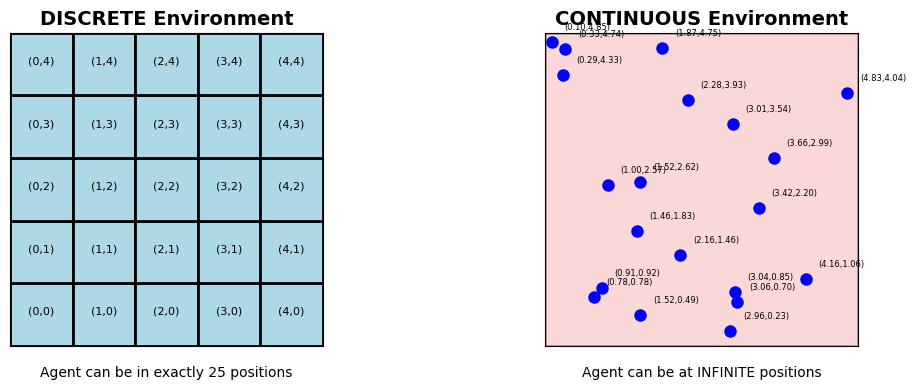

In [2]:
# Visualization: Discrete vs Continuous
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Discrete: Grid world
ax1.set_title('DISCRETE Environment', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)
for i in range(5):
    for j in range(5):
        rect = patches.Rectangle((i, j), 1, 1, linewidth=2, 
                                  edgecolor='black', facecolor='lightblue')
        ax1.add_patch(rect)
        ax1.text(i+0.5, j+0.5, f'({i},{j})', ha='center', fontsize=8)
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.text(2.5, -0.5, 'Agent can be in exactly 25 positions', ha='center', fontsize=10)

# Continuous: 2D space
ax2.set_title('CONTINUOUS Environment', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)
rect = patches.Rectangle((0, 0), 5, 5, linewidth=2, 
                          edgecolor='black', facecolor='lightcoral', alpha=0.3)
ax2.add_patch(rect)
# Show some random positions
np.random.seed(42)
for _ in range(20):
    x, y = np.random.uniform(0, 5, 2)
    ax2.plot(x, y, 'bo', markersize=8)
    ax2.text(x+0.2, y+0.2, f'({x:.2f},{y:.2f})', fontsize=6)
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.text(2.5, -0.5, 'Agent can be at INFINITE positions', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 2. Fully Observable vs. Partially Observable

Can the agent see everything relevant?

**Fully Observable:** Agent sees the complete state. Chess - you see the entire board. Sudoku - all numbers visible.

**Partially Observable:** Hidden information. Poker - can't see opponent's cards. Self-driving car - can't see around corners.

Partial observability means the agent needs memory and has to track what it believes about unseen parts. Fully observable agents can be memoryless.

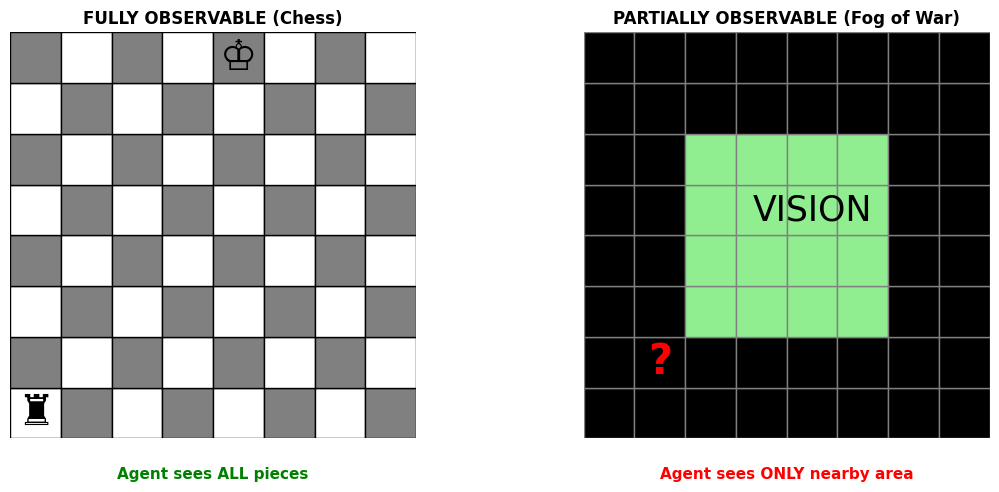

In [8]:
# Demonstration: Partially Observable Environment
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Fully observable: Chess
ax1.set_title('FULLY OBSERVABLE (Chess)', fontsize=12, fontweight='bold')
ax1.set_xlim(0, 8)
ax1.set_ylim(0, 8)
for i in range(8):
    for j in range(8):
        color = 'white' if (i+j) % 2 == 0 else 'gray'
        rect = patches.Rectangle((i, j), 1, 1, facecolor=color, edgecolor='black')
        ax1.add_patch(rect)
# Add some pieces
ax1.text(0.5, 0.5, '♜', fontsize=30, ha='center', va='center')
ax1.text(4.5, 7.5, '♔', fontsize=30, ha='center', va='center')
ax1.text(4, -0.8, 'Agent sees ALL pieces', ha='center', fontsize=11, fontweight='bold', color='green')
ax1.set_aspect('equal')
ax1.axis('off')

# Partially observable: Fog of war
ax2.set_title('PARTIALLY OBSERVABLE (Fog of War)', fontsize=12, fontweight='bold')
ax2.set_xlim(0, 8)
ax2.set_ylim(0, 8)
for i in range(8):
    for j in range(8):
        # Only center area visible
        if 2 <= i <= 5 and 2 <= j <= 5:
            color = 'lightgreen'
        else:
            color = 'black'
        rect = patches.Rectangle((i, j), 1, 1, facecolor=color, edgecolor='gray')
        ax2.add_patch(rect)
# Agent position
ax2.text(4.5, 4.5, 'VISION', fontsize=25, ha='center', va='center')
# Hidden enemy
ax2.text(1.5, 1.5, '?', fontsize=30, ha='center', va='center', color='red', fontweight='bold')
ax2.text(4, -0.8, 'Agent sees ONLY nearby area', ha='center', fontsize=11, fontweight='bold', color='red')
ax2.set_aspect('equal')
ax2.axis('off')

plt.tight_layout()
plt.show()

## 3. Deterministic vs. Stochastic

If I do action A in state S, do I always get the same result?

**Deterministic:** Same action + same state = same outcome. 2+2 always equals 4. Moving a chess piece always does the same thing.

**Stochastic:** Same action can produce different outcomes. Rolling dice, stock market reactions, whether your network request succeeds.

Stochastic environments need probability reasoning and risk management instead of perfect prediction.

In [4]:
# Demonstration: Deterministic vs Stochastic
class SimpleEnvironment:
    def __init__(self, stochastic=False):
        self.position = 0
        self.stochastic = stochastic
    
    def move_right(self):
        if self.stochastic:
            # 70% move right, 20% stay, 10% move left
            outcome = np.random.choice([1, 0, -1], p=[0.7, 0.2, 0.1])
            self.position += outcome
            return outcome
        else:
            # Always move right
            self.position += 1
            return 1

# Test both
np.random.seed(42)
trials = 10

print("DETERMINISTIC: Trying to move right 10 times")
env_det = SimpleEnvironment(stochastic=False)
outcomes_det = [env_det.move_right() for _ in range(trials)]
print(f"Outcomes: {outcomes_det}")
print(f"Final position: {env_det.position} (ALWAYS the same!)\n")

print("STOCHASTIC: Trying to move right 10 times")
env_sto = SimpleEnvironment(stochastic=True)
outcomes_sto = [env_sto.move_right() for _ in range(trials)]
print(f"Outcomes: {outcomes_sto}")
print(f"Final position: {env_sto.position} (UNPREDICTABLE!)")
print("\nRun this cell again - deterministic stays same, stochastic changes!")

DETERMINISTIC: Trying to move right 10 times
Outcomes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Final position: 10 (ALWAYS the same!)

STOCHASTIC: Trying to move right 10 times
Outcomes: [np.int64(1), np.int64(-1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0)]
Final position: 5 (UNPREDICTABLE!)

Run this cell again - deterministic stays same, stochastic changes!


## 4. Episodic vs. Continuing

Does the task have a clear end?

**Episodic:** Independent episodes with terminal states. Play a chess game, it ends, start fresh. Diagnose a patient, answer a question.

**Continuing:** No natural endpoint. Stock trading bot runs forever. Factory robot keeps working. Thermostat never "finishes".

Episodic tasks reset. Continuing tasks have to balance immediate vs. long-term consequences with no clean slate.

## 5. Static vs. Dynamic

Does the world change while the agent thinks?

**Static:** The environment waits. Chess waits for your move. Sudoku isn't going anywhere.

**Dynamic:** Time keeps moving. Traffic doesn't wait for your self-driving car to think. Video game enemies keep attacking.

**Semi-dynamic:** Environment doesn't change but your score does (timed chess).

Dynamic environments punish slow thinking. You need real-time decisions, not perfect plans.

## 6. Single-Agent vs. Multi-Agent

Are there other decision-makers?

**Single-Agent:** Just you. Solving a puzzle, robot vacuum cleaning, playing against a fixed chess algorithm.

**Multi-Agent:** Other agents with their own goals.
- Competitive: Opposing goals (poker, chess against human)
- Cooperative: Shared goals (rescue robots, team sports)
- Mixed: Both (business negotiations)

Multi-agent means you have to model what other agents will do. Game theory becomes relevant.

## 7. Known vs. Unknown

Does the agent know how the environment works?

| Aspect | Known | Unknown |
|--------|-------|---------|
| **Rules** | Given | Must learn |
| **Model** | Explicit | Built through experience |
| **Learning** | Optional | Required |
| **Exploration** | Minimal | Critical |
| **Examples** | Chess, factory robots | Driving, markets |

**Known:** Agent knows "if I do X, Y happens". Chess engine knows how pieces move. Factory robot knows its workspace.

**Unknown:** Agent figures it out through trial and error. Robot learning to walk doesn't initially know physics. Trading bot doesn't know market dynamics.

Unknown environments require exploration and learning algorithms. You can't plan if you don't know what your actions do.

In [5]:
# Demonstration: Known vs Unknown
class MysteryEnvironment:
    """Agent doesn't know the rule: reward = position^2"""
    def __init__(self):
        self.history = []
    
    def test_position(self, pos):
        reward = pos ** 2  # Hidden rule
        self.history.append((pos, reward))
        return reward
    
    def show_learning(self):
        if len(self.history) < 3:
            return "Not enough data to learn pattern"
        return f"Agent tested {len(self.history)} positions and is learning the pattern..."

# Simulate agent learning
env = MysteryEnvironment()
test_positions = [1, 2, 3, 4, 5]

print("UNKNOWN ENVIRONMENT: Agent doesn't know the reward function\n")
print("Agent explores different positions:")
for pos in test_positions:
    reward = env.test_position(pos)
    print(f"  Position {pos} → Reward: {reward}")

print(f"\n{env.show_learning()}")
print("After exploration, agent might guess: reward = position²")
print("\nIn KNOWN environment, agent would know this rule from the start!")

UNKNOWN ENVIRONMENT: Agent doesn't know the reward function

Agent explores different positions:
  Position 1 → Reward: 1
  Position 2 → Reward: 4
  Position 3 → Reward: 9
  Position 4 → Reward: 16
  Position 5 → Reward: 25

Agent tested 5 positions and is learning the pattern...
After exploration, agent might guess: reward = position²

In KNOWN environment, agent would know this rule from the start!


## 8. Benign vs. Adversarial

Is something actively trying to defeat the agent?

**Benign:** No active opposition. Puzzle solving, robot navigation, weather forecasting. The environment is neutral or random but not hostile.

**Adversarial:** An opponent working against you. Chess, poker, cybersecurity.

### Important: Adversarial ≠ Multi-Agent

**Spam filter** is adversarial (spammers adapt to bypass it) but not real-time multi-agent.  
**Security system** is adversarial (hackers probe it) but the attacker isn't in the environment simultaneously.  
**Adversarial ML** involves inputs crafted offline to fool models.

Multi-agent = multiple decision-makers in the environment.  
Adversarial = someone optimizing against your goal (can happen offline).

Adversarial environments need robustness and worst-case planning, not just optimal strategies.

## Real-World Environment Analysis

Let's classify some real systems:

### Self-Driving Car
- **Discrete/Continuous:** Continuous (speed, position)
- **Observable:** Partially observable (can't see around corners)
- **Deterministic/Stochastic:** Stochastic (unpredictable drivers)
- **Episodic/Continuing:** Continuing (no natural end)
- **Static/Dynamic:** Dynamic (traffic moves)
- **Single/Multi-agent:** Multi-agent (other drivers)
- **Known/Unknown:** Unknown (must learn road conditions)
- **Benign/Adversarial:** Mostly benign (drivers aren't trying to hit you)

### Chess Engine
- **Discrete/Continuous:** Discrete (finite positions)
- **Observable:** Fully observable (see entire board)
- **Deterministic/Stochastic:** Deterministic (no randomness)
- **Episodic/Continuing:** Episodic (game ends)
- **Static/Dynamic:** Static (waits for moves)
- **Single/Multi-agent:** Multi-agent (opponent)
- **Known/Unknown:** Known (rules are explicit)
- **Benign/Adversarial:** Adversarial (opponent tries to win)

### Spam Filter
- **Discrete/Continuous:** Discrete (spam/not spam)
- **Observable:** Partially observable (can't see sender's intent)
- **Deterministic/Stochastic:** Stochastic (varied spam tactics)
- **Episodic/Continuing:** Episodic (each email independent)
- **Static/Dynamic:** Static (email doesn't change while analyzing)
- **Single/Multi-agent:** Single-agent (one filter)
- **Known/Unknown:** Unknown (spam patterns evolve)
- **Benign/Adversarial:** **Adversarial** (spammers adapt to bypass filters)

**Note:** Spam filter is adversarial but NOT multi-agent in the traditional sense!

## The Hardest Case

All 8 dimensions at their worst:

- Continuous (infinite states)
- Partially observable (can't see everything)
- Stochastic (unpredictable)
- Continuing (no reset)
- Dynamic (changes while you think)
- Multi-agent (others interfering)
- Unknown (must learn)
- Adversarial (active opposition)

Example: Military drone in hostile territory. Continuous motion, can't see through fog, weather is random, mission continues indefinitely, enemy moves while you plan, multiple enemies, unknown terrain, getting shot at.

This is why real-world AI is hard.

## Summary

Before designing an agent, answer these:

1. **Discrete or Continuous?** → State representation
2. **Fully or Partially Observable?** → Need memory?
3. **Deterministic or Stochastic?** → Planning certainty
4. **Episodic or Continuing?** → Reward horizon
5. **Static or Dynamic?** → Time constraints
6. **Single or Multi-Agent?** → Model other agents?
7. **Known or Unknown?** → Need learning?
8. **Benign or Adversarial?** → Robustness requirements

Environment type determines algorithm:

- Fully observable, deterministic, known → A* search
- Partially observable, stochastic, unknown → Reinforcement learning
- Multi-agent, adversarial → Game theory
- Dynamic, continuous → Real-time control

Classify your environment before picking algorithms.